In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("lemonade.csv")
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")
df["month"] = df.index.month_name()

### Using lemonade.csv dataset and focusing on continuous variables:

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [9]:
def get_lower_bounds(col, mult=1.5):
    '''
    positional arguments:
    col: a pandas Series
    keyword arguments:
    mult: default 1.5, the magnutude specified for the IQR rule
    
    returns:
    lower_bound, upper_bound: two float values representing the fence values requested
    '''
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - mult * iqr
    return lower_bound

outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound = get_lower_bounds(df[col])
        print(f' Lower bound for {col} : {lower_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] < lower_bound)]
    else:
        pass

 Lower bound for Temperature : 16.700000000000003

-----------------
 Lower bound for Rainfall : 0.26

-----------------
 Lower bound for Flyers : 4.0

-----------------
 Lower bound for Price : 0.5

-----------------
 Lower bound for Sales : 5.0

-----------------


Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [10]:
def get_upper_bounds(col, mult=1.5):
  
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q1 - mult * iqr
    return upper_bound

outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        upper_bound = get_upper_bounds(df[col])
        print(f' upper bound for {col} : {upper_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound)]
    else:
        pass

 upper bound for Temperature : 16.700000000000003

-----------------
 upper bound for Rainfall : 0.26

-----------------
 upper bound for Flyers : 4.0

-----------------
 upper bound for Price : 0.5

-----------------
 upper bound for Sales : 5.0

-----------------


Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?\

In [11]:
def get_lower_bounds_mult_3(col, mult=3):
  
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - mult * iqr
    return lower_bound

outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound = get_lower_bounds(df[col])
        print(f' lower bound for {col} : {lower_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > lower_bound)]
    else:
        pass

 lower bound for Temperature : 16.700000000000003

-----------------
 lower bound for Rainfall : 0.26

-----------------
 lower bound for Flyers : 4.0

-----------------
 lower bound for Price : 0.5

-----------------
 lower bound for Sales : 5.0

-----------------


Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [12]:
def get_upper_bounds_mult_3(col, mult=3):
  
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q1 - mult * iqr
    return upper_bound

outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        upper_bound = get_upper_bounds(df[col])
        print(f' upper bound for {col} : {upper_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound)]
    else:
        pass

 upper bound for Temperature : 16.700000000000003

-----------------
 upper bound for Rainfall : 0.26

-----------------
 upper bound for Flyers : 4.0

-----------------
 upper bound for Price : 0.5

-----------------
 upper bound for Sales : 5.0

-----------------


### Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

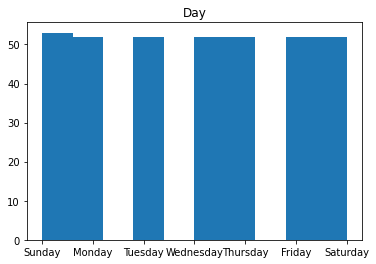

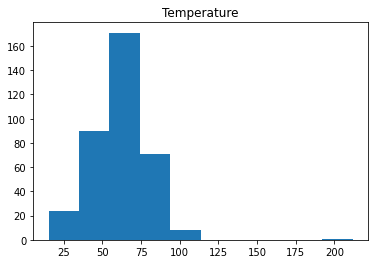

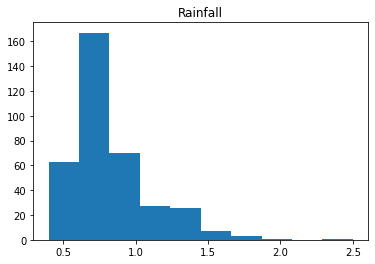

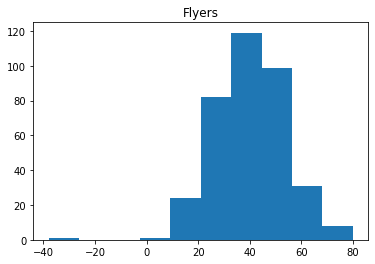

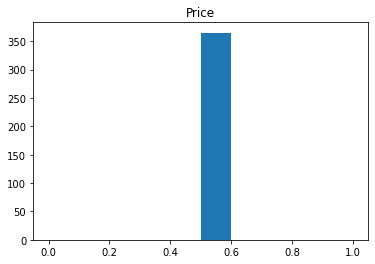

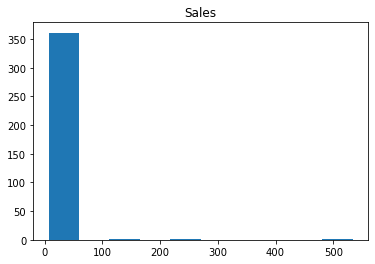

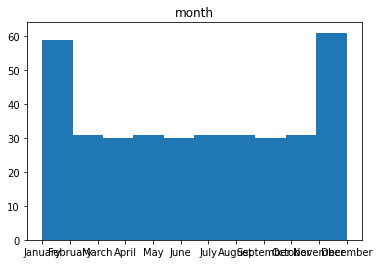

In [15]:
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

Use a 2 sigma decision rule to isolate the outliers.

In [31]:
for x in df.drop(columns=['Day','Price','Sales','month']):
    zscores = pd.Series((df[x] - df[x].mean()) / df[x].std())
df[zscores.abs() >= 2]
    

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41,June
2017-06-20,Tuesday,85.1,0.54,70,0.5,37,June
2017-06-21,Wednesday,94.3,0.47,76,0.5,41,June
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-14,Friday,92.0,0.50,80,0.5,40,July
2017-07-18,Tuesday,99.3,0.47,76,0.5,41,July
2017-07-23,Sunday,89.1,0.51,72,0.5,37,July
2017-07-24,Monday,83.5,0.57,69,0.5,35,July


Do these make sense?
Should certain outliers be kept or removed?
Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [32]:
df[zscores.abs() >= 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November
